## Project goal:
#### In this project, using a dataset of nearly 11K movies, I'll try to analyze what makes a movie profitable

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

## ETL

In [2]:
movies=pd.read_csv('tmdb_movies_data.csv')

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [5]:
# Creating a new dataframe using only the relevant columns for the analysis
movies=movies[['budget_adj', 'revenue_adj', 'original_title', 'cast',
        'director', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average']]

### Dataset columns explanation:
#### •	budget_adj: Adjusted budget (inflation-adjusted)
#### •	revenue_adj: Adjusted revenue (inflation-adjusted)
#### •	original_title: Movie title
#### •	cast: List of main actors (separated by "|")
#### •	director: Movie director (separated by "|")
#### •	runtime: Movie duration in minutes
#### •	genres: Movie genres (separated by "|")
#### •	release_date: Movie release date
#### •	vote_count: Number of user votes (from TMDB)
#### •	vote_average: Average rating (from TMDB)

In [6]:
# Converting date column from object to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget_adj      10866 non-null  float64       
 1   revenue_adj     10866 non-null  float64       
 2   original_title  10866 non-null  object        
 3   cast            10790 non-null  object        
 4   director        10822 non-null  object        
 5   runtime         10866 non-null  int64         
 6   genres          10843 non-null  object        
 7   release_date    10866 non-null  datetime64[ns]
 8   vote_count      10866 non-null  int64         
 9   vote_average    10866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 849.0+ KB


In [8]:
movies.head()

,budget_adj,revenue_adj,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average
0,137999939.3,1.392446e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5
1,137999939.3,3.481613e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1
2,101199955.5,2.716190e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3
3,183999919.0,1.902723e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5
4,174799923.1,1.385749e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3


In [9]:
# Displaying the money in a clearer and more understable format 
pd.options.display.float_format = '{:,.1f}'.format

In [10]:
movies.head()

,budget_adj,revenue_adj,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average
0,"137,999,939.3","1,392,445,893.0",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5
1,"137,999,939.3","348,161,292.5",Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1
2,"101,199,955.5","271,619,025.4",Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3
3,"183,999,919.0","1,902,723,130.0",Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5
4,"174,799,923.1","1,385,748,801.0",Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3


In [11]:
# Removing lines with values that can't be analyzed

In [12]:
# Removing lines with NULL values
movies=movies.dropna()

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10732 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget_adj      10732 non-null  float64       
 1   revenue_adj     10732 non-null  float64       
 2   original_title  10732 non-null  object        
 3   cast            10732 non-null  object        
 4   director        10732 non-null  object        
 5   runtime         10732 non-null  int64         
 6   genres          10732 non-null  object        
 7   release_date    10732 non-null  datetime64[ns]
 8   vote_count      10732 non-null  int64         
 9   vote_average    10732 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 922.3+ KB


In [14]:
# Checking if there are lines with no data on budget (in this dataset it's 0 instead of NULL)
len(movies[movies['budget_adj']==0])

5578

In [15]:
# Removing those lines
movies.drop(labels=movies[movies['budget_adj']==0].index, axis=0, inplace=True)

In [16]:
# Checking if the removal was succesful
len(movies[movies['budget_adj']==0])

0

In [17]:
# Checking if there are lines with no data on revenue (in this dataset it's 0 instead of NULL)
len(movies[movies['revenue_adj']==0])

1304

In [18]:
# Removing those lines
movies.drop(labels=movies[movies['revenue_adj']==0].index, axis=0, inplace=True)

In [19]:
# Checking if the removal was succesful
len(movies[movies['revenue_adj']==0])

0

In [20]:
# Checking if there are lines with no data on vote count (in this dataset it's 0 instead of NULL)
len(movies[movies['vote_count']==0])

0

In [21]:
# Checking if there are lines with no data on vote average (in this dataset it's 0 instead of NULL)
len(movies[movies['vote_average']==0])

0

In [22]:
# Checking if there are lines with no data on runtime (in this dataset it's 0 instead of NULL)
len(movies[movies['runtime']==0])

0

In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3850 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget_adj      3850 non-null   float64       
 1   revenue_adj     3850 non-null   float64       
 2   original_title  3850 non-null   object        
 3   cast            3850 non-null   object        
 4   director        3850 non-null   object        
 5   runtime         3850 non-null   int64         
 6   genres          3850 non-null   object        
 7   release_date    3850 non-null   datetime64[ns]
 8   vote_count      3850 non-null   int64         
 9   vote_average    3850 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 330.9+ KB


In [24]:
# Creating new columns to help the analysis
movies['profit'] = movies['revenue_adj']-movies['budget_adj'] # the net gross of the movie
movies['ROI'] = movies['profit']/movies['budget_adj']*100 # the return on investment
movies['release_year']=movies['release_date'].dt.year # release year
movies['release_month']=movies['release_date'].dt.month_name() # release month name

In [25]:
movies.head()

,budget_adj,revenue_adj,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,profit,ROI,release_year,release_month
0,"137,999,939.3","1,392,445,893.0",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,"1,254,445,953.7",909.0,2015,June
1,"137,999,939.3","348,161,292.5",Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,"210,161,353.2",152.3,2015,May
2,"101,199,955.5","271,619,025.4",Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,"170,419,069.9",168.4,2015,March
3,"183,999,919.0","1,902,723,130.0",Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,"1,718,723,211.0",934.1,2015,December
4,"174,799,923.1","1,385,748,801.0",Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,"1,210,948,877.9",692.8,2015,April


In [26]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3850 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget_adj      3850 non-null   float64       
 1   revenue_adj     3850 non-null   float64       
 2   original_title  3850 non-null   object        
 3   cast            3850 non-null   object        
 4   director        3850 non-null   object        
 5   runtime         3850 non-null   int64         
 6   genres          3850 non-null   object        
 7   release_date    3850 non-null   datetime64[ns]
 8   vote_count      3850 non-null   int64         
 9   vote_average    3850 non-null   float64       
 10  profit          3850 non-null   float64       
 11  ROI             3850 non-null   float64       
 12  release_year    3850 non-null   int32         
 13  release_month   3850 non-null   object        
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object

## Analyzation and Visualization

In [27]:
# Checking several statistics of the dataset- minimal budget and revenue numbers doesn't make sense, they're only a few dollars
movies.describe()

,budget_adj,revenue_adj,runtime,release_date,vote_count,vote_average,profit,ROI,release_year
count,"3,850.0","3,850.0","3,850.0",3850,"3,850.0","3,850.0","3,850.0","3,850.0","3,850.0"
mean,"44,289,889.0","137,195,925.3",109.2,2001-10-20 06:44:41.766233728,528.3,6.2,"92,906,036.3","29,734.6","2,001.3"
min,1.0,2.4,15.0,1960-06-15 00:00:00,10.0,2.2,"-413,912,431.0",-100.0,"1,960.0"
25%,"13,172,182.0","18,414,975.6",95.0,1995-12-22 00:00:00,71.0,5.7,"-1,504,994.6",-12.3,"1,995.0"
50%,"30,045,239.0","61,790,728.2",106.0,2004-09-02 00:00:00,204.5,6.2,"27,413,880.8",112.0,"2,004.0"
75%,"60,728,665.9","163,377,455.1",119.0,2010-06-23 18:00:00,580.8,6.7,"107,534,577.9",321.0,"2,010.0"
max,"425,000,000.0","2,827,123,750.0",338.0,2015-12-30 00:00:00,"9,767.0",8.4,"2,750,136,650.6","101,861,828.3","2,015.0"
std,"44,808,371.6","216,184,829.8",19.9,NaN,880.2,0.8,"194,156,360.6","1,645,109.6",11.3


In [28]:
# After checking online, some movie's budget and revenue are incorrect- too low
# Removing movies with budget or revenue of less than 1000 dollars
movies.drop(labels=movies[movies['budget_adj']<1000].index, axis=0, inplace=True)
movies.drop(labels=movies[movies['revenue_adj']<1000].index, axis=0, inplace=True)

In [29]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3815 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget_adj      3815 non-null   float64       
 1   revenue_adj     3815 non-null   float64       
 2   original_title  3815 non-null   object        
 3   cast            3815 non-null   object        
 4   director        3815 non-null   object        
 5   runtime         3815 non-null   int64         
 6   genres          3815 non-null   object        
 7   release_date    3815 non-null   datetime64[ns]
 8   vote_count      3815 non-null   int64         
 9   vote_average    3815 non-null   float64       
 10  profit          3815 non-null   float64       
 11  ROI             3815 non-null   float64       
 12  release_year    3815 non-null   int32         
 13  release_month   3815 non-null   object        
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object

In [30]:
movies.head()

,budget_adj,revenue_adj,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,profit,ROI,release_year,release_month
0,"137,999,939.3","1,392,445,893.0",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,"1,254,445,953.7",909.0,2015,June
1,"137,999,939.3","348,161,292.5",Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,"210,161,353.2",152.3,2015,May
2,"101,199,955.5","271,619,025.4",Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,"170,419,069.9",168.4,2015,March
3,"183,999,919.0","1,902,723,130.0",Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,"1,718,723,211.0",934.1,2015,December
4,"174,799,923.1","1,385,748,801.0",Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,"1,210,948,877.9",692.8,2015,April


In [31]:
# Now the numbers make more sense
movies.describe()

,budget_adj,revenue_adj,runtime,release_date,vote_count,vote_average,profit,ROI,release_year
count,"3,815.0","3,815.0","3,815.0",3815,"3,815.0","3,815.0","3,815.0","3,815.0","3,815.0"
mean,"44,594,272.3","138,390,384.0",109.3,2001-10-27 00:17:44.429882112,532.2,6.2,"93,796,111.7","1,022.4","2,001.3"
min,"7,755.2","1,840.6",26.0,1960-06-15 00:00:00,10.0,2.2,"-413,912,431.0",-100.0,"1,960.0"
25%,"13,387,857.1","19,161,463.4",96.0,1996-01-08 12:00:00,73.0,5.7,"-1,480,389.9",-11.8,"1,995.5"
50%,"30,306,534.8","62,606,187.1",106.0,2004-09-12 00:00:00,207.0,6.2,"28,198,810.0",112.6,"2,004.0"
75%,"60,774,609.8","164,930,318.4",119.0,2010-07-04 12:00:00,583.0,6.7,"108,453,099.0",320.9,"2,010.0"
max,"425,000,000.0","2,827,123,750.0",338.0,2015-12-30 00:00:00,"9,767.0",8.4,"2,750,136,650.6","1,288,938.7","2,015.0"
std,"44,833,302.0","216,781,993.0",19.8,NaN,883.2,0.8,"194,768,281.7","26,411.9",11.3


In [32]:
movies

,budget_adj,revenue_adj,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,profit,ROI,release_year,release_month
0,"137,999,939.3","1,392,445,893.0",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,"1,254,445,953.7",909.0,2015,June
1,"137,999,939.3","348,161,292.5",Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,"210,161,353.2",152.3,2015,May
2,"101,199,955.5","271,619,025.4",Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,"170,419,069.9",168.4,2015,March
3,"183,999,919.0","1,902,723,130.0",Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,"1,718,723,211.0",934.1,2015,December
4,"174,799,923.1","1,385,748,801.0",Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,"1,210,948,877.9",692.8,2015,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,"50,385,110.2","226,643,572.4",Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,1966-06-21,74,7.5,"176,258,462.2",349.8,1966,June
10828,"20,154,044.1","87,334,191.0",Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,1966-07-13,46,6.3,"67,180,146.9",333.3,1966,July
10829,"31,258,922.4","40,308,088.1",El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,1966-12-17,36,6.9,"9,049,165.8",28.9,1966,December
10835,"80,616,176.3","134,360,293.8",The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,1966-12-20,28,7.0,"53,744,117.5",66.7,1966,December


In [33]:
# Creating a dataset to analyze cast influence- splitting the cast column into individual cast members and expanding each movie into multiple rows, one for each cast member
cast_exploded = movies.assign(cast=movies["cast"].str.split("|")).explode("cast")

In [34]:
cast_exploded

,budget_adj,revenue_adj,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,profit,ROI,release_year,release_month
0,"137,999,939.3","1,392,445,893.0",Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,"1,254,445,953.7",909.0,2015,June
0,"137,999,939.3","1,392,445,893.0",Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,"1,254,445,953.7",909.0,2015,June
0,"137,999,939.3","1,392,445,893.0",Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,"1,254,445,953.7",909.0,2015,June
0,"137,999,939.3","1,392,445,893.0",Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,"1,254,445,953.7",909.0,2015,June
0,"137,999,939.3","1,392,445,893.0",Jurassic World,Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,"1,254,445,953.7",909.0,2015,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10848,"34,362,645.1","80,616,176.3",Fantastic Voyage,Stephen Boyd,Richard Fleischer,100,Adventure|Science Fiction,1966-08-24,42,6.7,"46,253,531.2",134.6,1966,August
10848,"34,362,645.1","80,616,176.3",Fantastic Voyage,Raquel Welch,Richard Fleischer,100,Adventure|Science Fiction,1966-08-24,42,6.7,"46,253,531.2",134.6,1966,August
10848,"34,362,645.1","80,616,176.3",Fantastic Voyage,Edmond O'Brien,Richard Fleischer,100,Adventure|Science Fiction,1966-08-24,42,6.7,"46,253,531.2",134.6,1966,August
10848,"34,362,645.1","80,616,176.3",Fantastic Voyage,Donald Pleasence,Richard Fleischer,100,Adventure|Science Fiction,1966-08-24,42,6.7,"46,253,531.2",134.6,1966,August


In [35]:
# Creating a dataset to analyze genre influence- splitting the genres column into individual genres and expanding each movie into multiple rows, one for each genre
genres_exploded = movies.assign(genres=movies["genres"].str.split("|")).explode("genres")

In [36]:
genres_exploded

,budget_adj,revenue_adj,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,profit,ROI,release_year,release_month
0,"137,999,939.3","1,392,445,893.0",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,"1,254,445,953.7",909.0,2015,June
0,"137,999,939.3","1,392,445,893.0",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.5,"1,254,445,953.7",909.0,2015,June
0,"137,999,939.3","1,392,445,893.0",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.5,"1,254,445,953.7",909.0,2015,June
0,"137,999,939.3","1,392,445,893.0",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.5,"1,254,445,953.7",909.0,2015,June
1,"137,999,939.3","348,161,292.5",Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,2015-05-13,6185,7.1,"210,161,353.2",152.3,2015,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,"80,616,176.3","134,360,293.8",The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Drama,1966-12-20,28,7.0,"53,744,117.5",66.7,1966,December
10835,"80,616,176.3","134,360,293.8",The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,War,1966-12-20,28,7.0,"53,744,117.5",66.7,1966,December
10835,"80,616,176.3","134,360,293.8",The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Romance,1966-12-20,28,7.0,"53,744,117.5",66.7,1966,December
10848,"34,362,645.1","80,616,176.3",Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,100,Adventure,1966-08-24,42,6.7,"46,253,531.2",134.6,1966,August


In [37]:
# Creating a dataset to analyze director influence- splitting the director column into individual directors and expanding each movie into multiple rows, one for each director
director_exploded = movies.assign(director=movies["director"].str.split("|")).explode("director")

In [38]:
director_exploded

,budget_adj,revenue_adj,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,profit,ROI,release_year,release_month
0,"137,999,939.3","1,392,445,893.0",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,"1,254,445,953.7",909.0,2015,June
1,"137,999,939.3","348,161,292.5",Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,"210,161,353.2",152.3,2015,May
2,"101,199,955.5","271,619,025.4",Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,"170,419,069.9",168.4,2015,March
3,"183,999,919.0","1,902,723,130.0",Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,"1,718,723,211.0",934.1,2015,December
4,"174,799,923.1","1,385,748,801.0",Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,"1,210,948,877.9",692.8,2015,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,"50,385,110.2","226,643,572.4",Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,1966-06-21,74,7.5,"176,258,462.2",349.8,1966,June
10828,"20,154,044.1","87,334,191.0",Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,1966-07-13,46,6.3,"67,180,146.9",333.3,1966,July
10829,"31,258,922.4","40,308,088.1",El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,1966-12-17,36,6.9,"9,049,165.8",28.9,1966,December
10835,"80,616,176.3","134,360,293.8",The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,1966-12-20,28,7.0,"53,744,117.5",66.7,1966,December


### 10 highest grossing movies (by adjusted revenue, and by ROI)

In [39]:
movies.sort_values('revenue_adj',ascending=False).head(10)

,budget_adj,revenue_adj,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,profit,ROI,release_year,release_month
1386,"240,886,902.9","2,827,123,750.0",Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,"2,586,236,847.1","1,073.6",2009,December
1329,"39,575,591.4","2,789,712,242.0",Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,1977-03-20,4428,7.9,"2,750,136,650.6","6,949.1",1977,March
5231,"271,692,064.2","2,506,405,735.0",Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,1997-11-18,4654,7.3,"2,234,713,670.8",822.5,1997,November
10594,"39,289,276.6","2,167,324,901.0",The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,1973-12-26,1113,7.2,"2,128,035,624.4","5,416.3",1973,December
9806,"28,362,748.2","1,907,005,842.0",Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,1975-06-18,1415,7.3,"1,878,643,093.8","6,623.6",1975,June
3,"183,999,919.0","1,902,723,130.0",Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,"1,718,723,211.0",934.1,2015,December
8889,"23,726,245.2","1,791,694,309.0",E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,1982-04-03,1830,7.2,"1,767,968,063.8","7,451.5",1982,April
8094,"31,481,271.1","1,583,049,536.0",The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,1995-07-28,201,5.6,"1,551,568,264.9","4,928.5",1995,July
10110,"29,179,444.8","1,574,814,740.0",One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,1961-01-25,913,6.6,"1,545,635,295.2","5,297.0",1961,January
4361,"208,943,741.9","1,443,191,435.0",The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,2012-04-25,8903,7.3,"1,234,247,693.1",590.7,2012,April


In [40]:
movies.sort_values('ROI',ascending=False).head(10)

,budget_adj,revenue_adj,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,profit,ROI,release_year,release_month
7447,"15,775.0","203,346,220.1",Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,86,Horror|Mystery,2007-09-14,714,6.1,"203,330,445.1","1,288,938.7",2007,September
2449,"32,726.3","324,645,106.0",The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,81,Horror|Mystery,1999-07-14,522,6.3,"324,612,379.7","991,900.0",1999,July
1354,"35,977.8","25,184,467.2",Eraserhead,Jack Nance|Charlotte Stewart|Allen Joseph|Jean...,David Lynch,89,Science Fiction|Fantasy|Horror|Drama,1977-03-19,194,7.1,"25,148,489.4","69,900.0",1977,March
7277,"62,574.7","31,287,365.6",Pink Flamingos,Divine|David Lochary|Mary Vivian Pearce|Mink S...,John Waters,93,Comedy,1972-03-12,51,6.3,"31,224,790.9","49,900.0",1972,March
7178,"75,039.0","32,988,367.4",Super Size Me,Morgan Spurlock|Daryl Isaacs|Lisa Ganjhu|Steph...,Morgan Spurlock,100,Documentary|Comedy|Drama,2004-01-17,295,6.5,"32,913,328.4","43,861.7",2004,January
242,"92,000.0","39,251,239.9",The Gallows,Cassidy Gifford|Ryan Shoos|Pfeifer Brown|Reese...,Travis Cluff|Chris Lofing,87,Horror|Thriller,2015-07-10,247,5.0,"39,159,240.0","42,564.4",2015,July
7057,"150,077.9","63,111,168.0",Open Water,Blanchard Ryan|Daniel Travis|Saul Stein|Michae...,Chris Kentis,79,Drama|Thriller,2004-08-06,171,5.3,"62,961,090.1","41,952.3",2004,August
9762,"375,894.1","136,467,258.5",The Texas Chain Saw Massacre,Allen Danziger|Paul A. Partain|William Vail|Te...,Tobe Hooper,83,Horror|Thriller,1974-10-01,249,6.8,"136,091,364.4","36,204.7",1974,October
7827,"1,201,821.6","300,455,400.3",Mad Max,Mel Gibson|Joanne Samuel|Hugh Keays-Byrne|Stev...,George Miller,93,Adventure|Action|Thriller|Science Fiction,1979-04-12,667,6.5,"299,253,578.7","24,900.0",1979,April
10759,"1,002,810.2","233,989,048.6",Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,John Carpenter,91,Horror|Thriller,1978-10-25,522,7.3,"232,986,238.4","23,233.3",1978,October


### Influence of genre on revenue

#### Average revenue (adjusted) per genre

In [41]:
genres_exploded.groupby('genres')[['revenue_adj']].mean().sort_values('revenue_adj', ascending=False)

,revenue_adj
genres,
Animation,"293,881,575.5"
Adventure,"273,290,989.2"
Fantasy,"253,189,588.4"
Family,"246,148,092.2"
Science Fiction,"202,937,036.3"
Action,"196,627,567.8"
War,"155,898,111.7"
Music,"139,693,705.2"
Western,"135,674,767.4"


#### Average revenue (adjusted) per genre- visualization

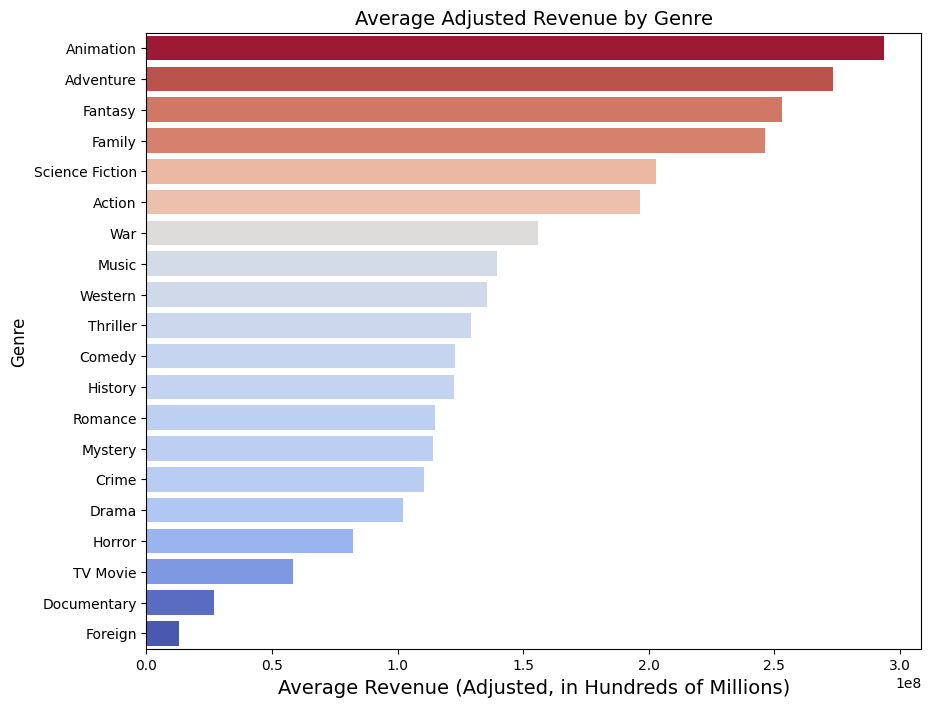

In [42]:
# Calculate the average revenue per genre
avg_revenue = genres_exploded.groupby('genres')['revenue_adj'].mean()

# Normalize revenue for color mapping (higher revenue = warmer colors)
norm = plt.Normalize(avg_revenue.min(), avg_revenue.max())

# Create color mapping for genres based on their average revenue
cmap = sb.color_palette('coolwarm', as_cmap=True) # Get the colormap
genre_colors = {genre: cmap(norm(avg_revenue[genre])) # Create a dictionary mapping genres to colors
                for genre in avg_revenue.index}

# Set genres in descending order by average revenue
genre_order = ['Animation', 'Adventure', 'Fantasy', 'Family',
               'Science Fiction', 'Action', 'War', 'Music',
               'Western', 'Thriller', 'Comedy', 'History',
               'Romance', 'Mystery', 'Crime', 'Drama',
               'Horror', 'TV Movie', 'Documentary', 'Foreign']

plt.figure(figsize=(10, 8))
sb.barplot(
    data=genres_exploded,
    x='revenue_adj',
    y='genres',
    hue='genres',
    palette=genre_colors,
    order=genre_order,
    errorbar=None,
    legend=False)

plt.title("Average Adjusted Revenue by Genre", fontsize=14)
plt.xlabel("Average Revenue (Adjusted, in Hundreds of Millions)", fontsize=14)
plt.ylabel("Genre", fontsize=12)
plt.show()

#### Average viewer rating per genre

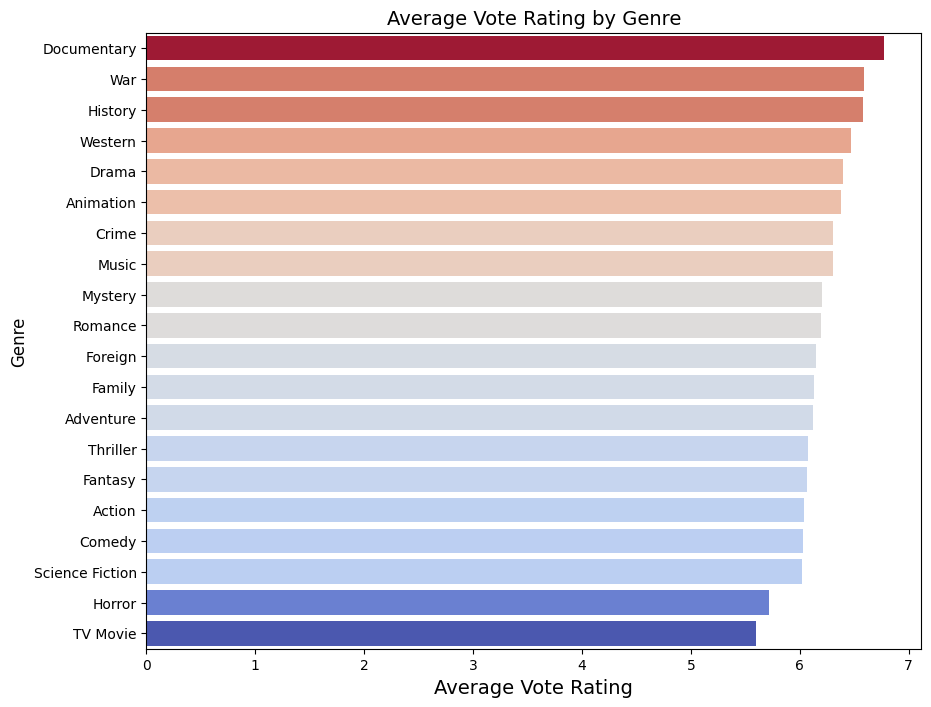

In [43]:
# Calculate the average vote per genre
avg_vote = genres_exploded.groupby('genres')['vote_average'].mean()

# Normalize vote for color mapping (higher vote average = warmer colors)
norm = plt.Normalize(avg_vote.min(), avg_vote.max())

# Create color mapping for genres based on their average vote
cmap = sb.color_palette('coolwarm', as_cmap=True) # Get the colormap
genre_colors = {genre: cmap(norm(avg_vote[genre])) # Create a dictionary mapping genres to colors
                for genre in avg_vote.index}

# Set genres in descending order by average vote
genre_order = ['Documentary', 'War', 'History', 'Western',
               'Drama', 'Animation', 'Crime', 'Music',
               'Mystery', 'Romance', 'Foreign', 'Family',
               'Adventure', 'Thriller', 'Fantasy', 'Action',
               'Comedy', 'Science Fiction', 'Horror', 'TV Movie']

plt.figure(figsize=(10, 8))
sb.barplot(
    data=genres_exploded,
    x='vote_average',
    y='genres',
    hue='genres',
    palette=genre_colors,
    order=genre_order,
    errorbar=None,
    legend=False)

plt.title("Average Vote Rating by Genre", fontsize=14)
plt.xlabel("Average Vote Rating", fontsize=14)
plt.ylabel("Genre", fontsize=12)
plt.show()

### Influence of actors on revenue

#### 10 most profitable actors by average

In [44]:
# Checking several statistics of the dataset regarding the number of movies an actor made
cast_exploded.groupby('cast')[['revenue_adj']].count().describe()

,revenue_adj
count,"6,770.0"
mean,2.8
std,4.1
min,1.0
25%,1.0
50%,1.0
75%,3.0
max,52.0


In [45]:
# To ensure the analysis is correct, I was trying to avoid the following situation:
# an actor made just one movie! and that movie had very high revenue- therefore their average revenue was very high although they only made one movie
# The average number of movies for an actor is 2.8- to avoid the situation mentioned above, I only used actors who made at least 3 movies
mask=cast_exploded.groupby('cast')['revenue_adj'].transform('count') >= 3
cast_exploded[mask].groupby('cast')[['revenue_adj']].mean().sort_values('revenue_adj', ascending=False).head(10)

,revenue_adj
cast,
Mark Hamill,"1,475,871,964.8"
Carrie Fisher,"1,096,897,367.9"
Alec Guinness,"1,031,137,571.0"
Rupert Grint,"928,704,523.6"
Murray Hamilton,"828,219,218.9"
Robert Shaw,"819,212,045.1"
Ian McDiarmid,"804,014,583.7"
Emma Watson,"732,506,666.3"
Richard Armitage,"722,667,305.2"


#### 50 most profitable actors by average, and the revenue of their movies

In [46]:
# Since there are more than 6,000 actors, I only chose the 50 most profitable by avergae- to check how their movies faired at the box-office

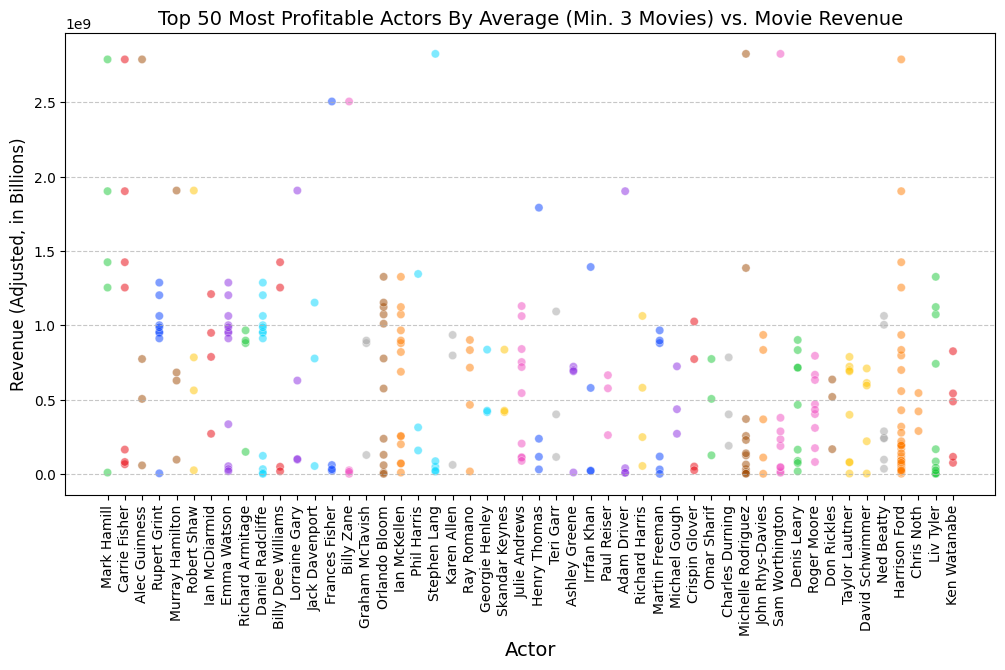

In [47]:
# Calculate the number of movies for each actor
actor_movie_counts = cast_exploded['cast'].value_counts()

# Keep only actors with at least 3 movies
valid_actors = actor_movie_counts[actor_movie_counts >= 3].index

# Filter the data to include only the actors who passed the filter
filtered_df = cast_exploded[cast_exploded['cast'].isin(valid_actors)]

# Calculate the average revenue only for the actors who passed the filter
avg_revenue_per_actor = filtered_df.groupby('cast')['revenue_adj'].mean()

# Sort and select the top 50 most profitable actors on average
top_50_actors = avg_revenue_per_actor.nlargest(50)

# Filter the data again to include only these 50 actors
filtered_df = filtered_df[filtered_df['cast'].isin(top_50_actors.index)]

plt.figure(figsize=(12, 6))
sb.scatterplot(data=filtered_df, 
               x=pd.Categorical(filtered_df['cast'], categories=top_50_actors.index, ordered=True), 
               y='revenue_adj', alpha=0.5,
               hue='cast',
               legend=False,
               palette="bright")

plt.xticks(rotation=90)
plt.xlabel('Actor', fontsize=14)
plt.ylabel('Revenue (Adjusted, in Billions)', fontsize=12)
plt.title('Top 50 Most Profitable Actors By Average (Min. 3 Movies) vs. Movie Revenue', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Influence of directors on revenue

#### 10 most profitable directors by average

In [48]:
# Checking several statistics of the dataset regarding the number of movies a director made
director_exploded.groupby('director')[['revenue_adj']].count().describe()

,revenue_adj
count,"1,760.0"
mean,2.3
std,2.5
min,1.0
25%,1.0
50%,1.0
75%,3.0
max,28.0


In [49]:
# Once again I was trying to avoid the following situation:
# a director made just one movie! and that movie had very high revenue- therefore their average revenue was very high although they only made one movie
# The average number of movies for a director is 2.3- to avoid the situation mentioned above, I only used directors who made at least 2 movies
mask=director_exploded.groupby('director')['revenue_adj'].transform('count') >= 2
director_exploded[mask].groupby('director')[['revenue_adj']].mean().sort_values('revenue_adj', ascending=False).head(10)

,revenue_adj
director,
George Lucas,"1,052,319,860.3"
David Yates,"1,044,363,814.9"
Joss Whedon,"926,407,996.2"
James Cameron,"915,902,607.2"
Lee Unkrich,"854,017,658.2"
Pierre Coffin,"838,790,501.3"
Pete Docter,"740,616,729.4"
Andrew Adamson,"729,888,879.9"
Wolfgang Reitherman,"729,342,415.5"


#### 50 most profitable directors by average, and the revenue of their movies

In [50]:
# Since there are more than 1,500 directors, I only chose the 50 most profitable by avergae- to check how their movies faired at the box-office

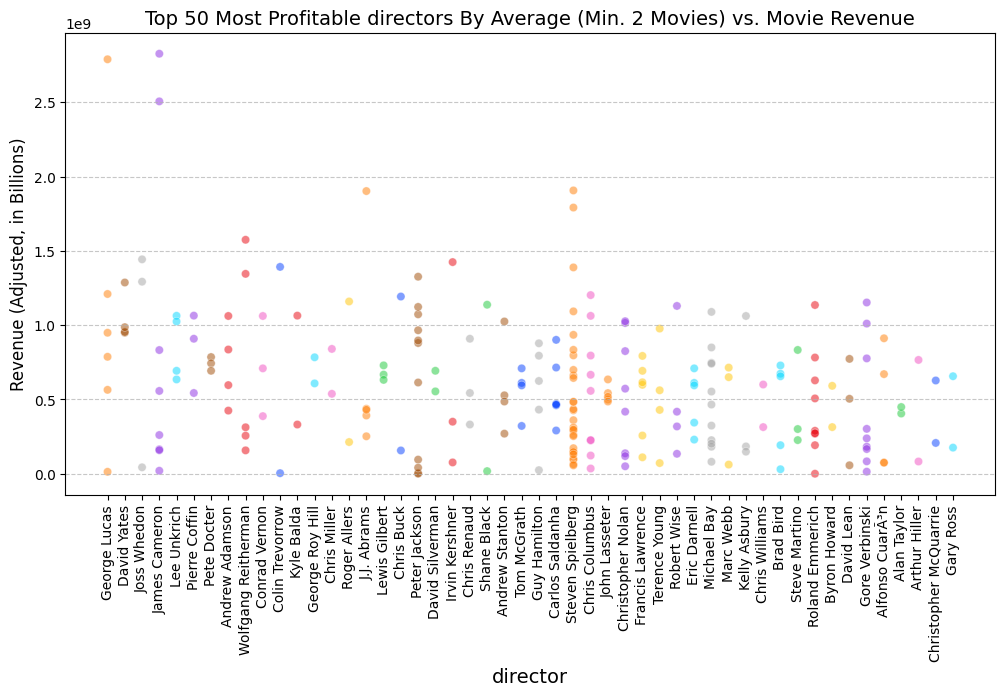

In [51]:
# Calculate the number of movies for each director
director_movie_counts = director_exploded['director'].value_counts()

# Keep only directors with at least 2 movies
valid_directors = director_movie_counts[director_movie_counts >= 2].index

# Filter the data to include only the directors who passed the filter
filtered_df = director_exploded[director_exploded['director'].isin(valid_directors)]

# Calculate the average revenue only for the directors who passed the filter
avg_revenue_per_director = filtered_df.groupby('director')['revenue_adj'].mean()

# Sort and select the top 50 most profitable directors on average
top_50_directors = avg_revenue_per_director.nlargest(50)

# Filter the data again to include only these 50 directors
filtered_df = filtered_df[filtered_df['director'].isin(top_50_directors.index)]

plt.figure(figsize=(12, 6))
sb.scatterplot(data=filtered_df, 
               x=pd.Categorical(filtered_df['director'], categories=top_50_directors.index, ordered=True), 
               y='revenue_adj', alpha=0.5,
               hue='director',
               legend=False,
               palette="bright")

plt.xticks(rotation=90)
plt.xlabel('director', fontsize=14)
plt.ylabel('Revenue (Adjusted, in Billions)', fontsize=12)
plt.title('Top 50 Most Profitable directors By Average (Min. 2 Movies) vs. Movie Revenue', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Influence of budget on revenue

#### Average of budget and revenue over time

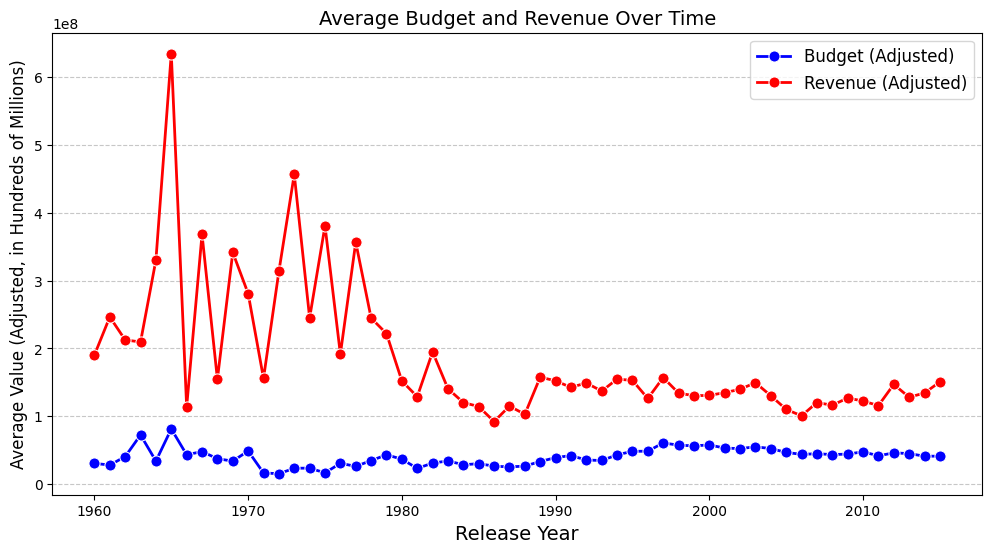

In [52]:
plt.figure(figsize=(12, 6))

sb.lineplot(data=movies, x='release_year', y='budget_adj',
            errorbar=None, marker='o', label='Budget (Adjusted)',
            color='blue', linewidth=2, markersize=8)
sb.lineplot(data=movies, x='release_year', y='revenue_adj',
            errorbar=None, marker='o', label='Revenue (Adjusted)',
            color='red', linewidth=2, markersize=8)

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Value (Adjusted, in Hundreds of Millions)', fontsize=12)
plt.title('Average Budget and Revenue Over Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Budget vs. Revenue

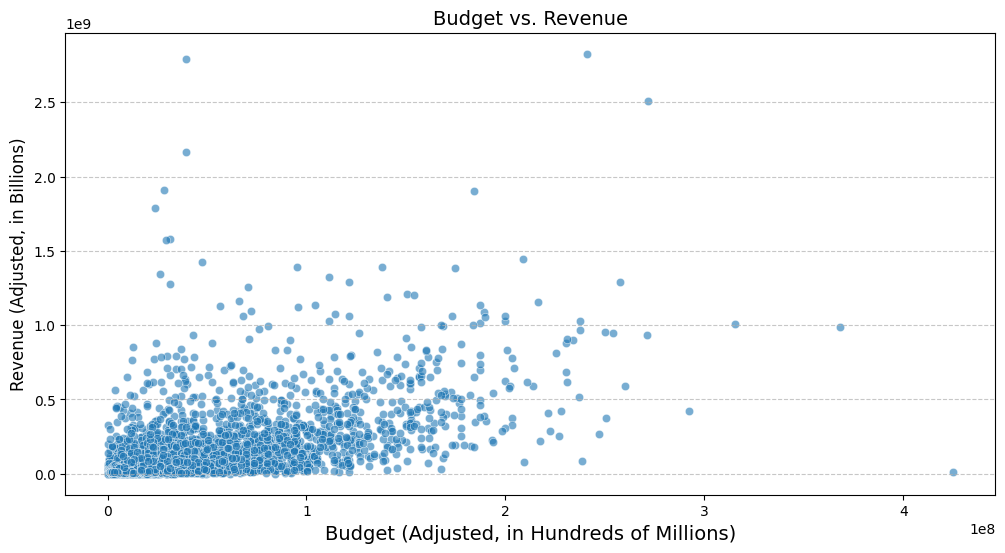

In [53]:
plt.figure(figsize=(12, 6))

sb.scatterplot(data=movies,
               x='budget_adj',
               y='revenue_adj',
               alpha=0.6)

plt.title('Budget vs. Revenue', fontsize=14)
plt.xlabel('Budget (Adjusted, in Hundreds of Millions)', fontsize=14)
plt.ylabel('Revenue (Adjusted, in Billions)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Influence of runtime on revenue

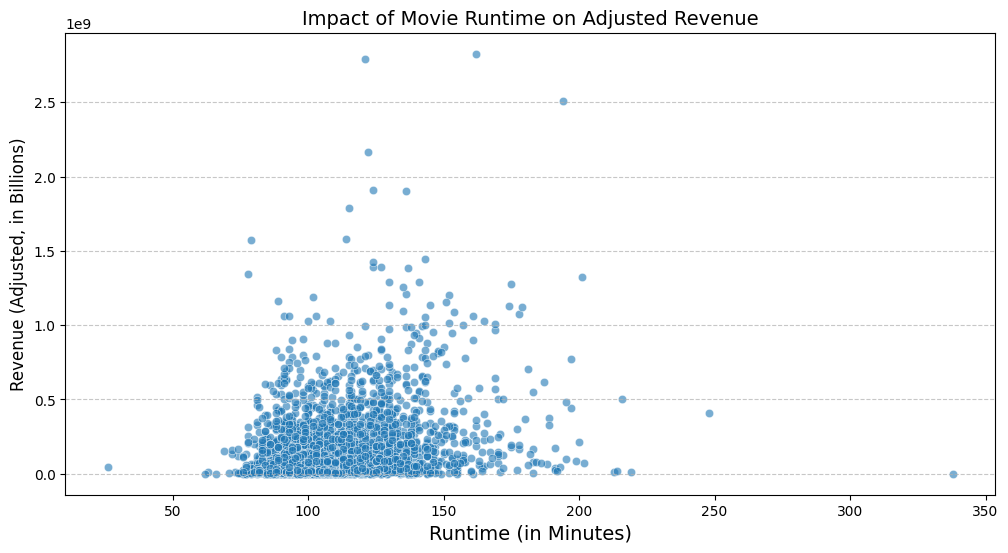

In [54]:
plt.figure(figsize=(12, 6))

sb.scatterplot(data=movies,
               x='runtime',
               y='revenue_adj',
              alpha=0.6)

plt.title('Impact of Movie Runtime on Adjusted Revenue', fontsize=14)
plt.xlabel('Runtime (in Minutes)', fontsize=14)
plt.ylabel('Revenue (Adjusted, in Billions)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Amount of movies released each year- over the years

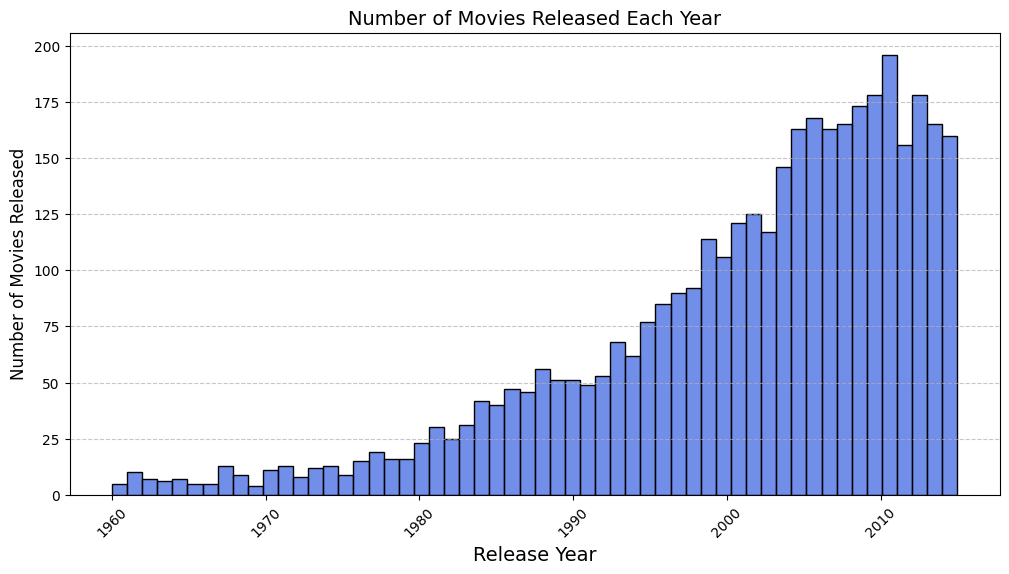

In [55]:
plt.figure(figsize=(12, 6))
sb.histplot(data=movies, x='release_year', bins=movies['release_year'].nunique(), color='royalblue')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=12)
plt.title('Number of Movies Released Each Year', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Which months are best to release movies at?

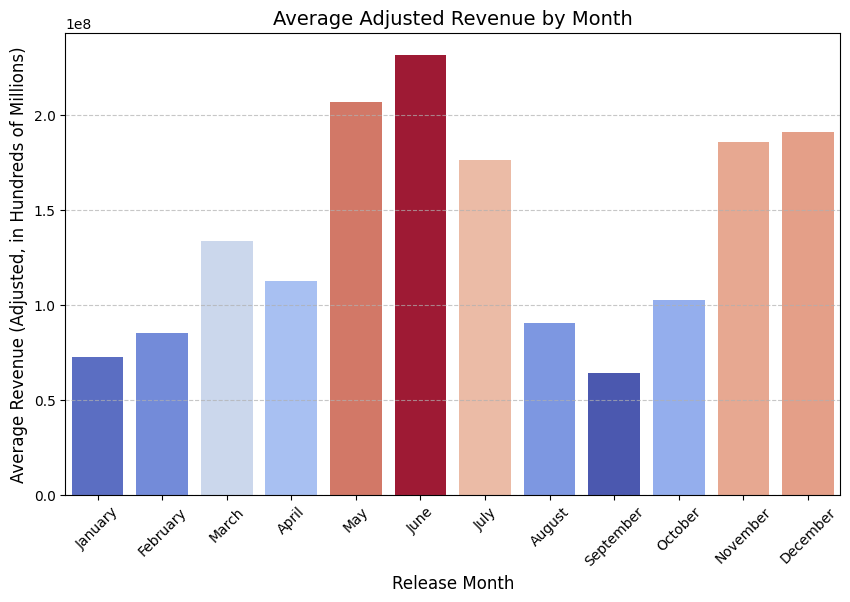

In [56]:
# Calculate the average revenue per month
avg_revenue = movies.groupby('release_month')['revenue_adj'].mean()

# Normalize revenue for color mapping (higher revenue = warmer colors)
norm = plt.Normalize(avg_revenue.min(), avg_revenue.max())
cmap = plt.colormaps['coolwarm']

# Generate colors for each month based on normalized revenue
colors = {month: cmap(norm(avg_revenue[month])) for month in avg_revenue.index}

# Set months in chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))

sb.barplot(
    data=movies,
    x='release_month',
    y='revenue_adj',
    hue='release_month', 
    palette=colors,  
    order=month_order, 
    errorbar=None,
    legend=False)

plt.title("Average Adjusted Revenue by Month", fontsize=14)
plt.xlabel("Release Month", fontsize=12)
plt.ylabel("Average Revenue (Adjusted, in Hundreds of Millions)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Conclusions

#### Budget vs. Revenue Relationship:
  - Higher budgets generally lead to higher revenues, but there may be diminishing returns — not every expensive movie
    becomes a blockbuster.
  - Some outliers exist — low-budget films that performed exceptionally well.
#### Impact of Movie Genre on Profitability:
  - Genres such as animation, adventure, fantasy, family, science fiction, and action tend to be significantly more
    profitable.
  - A higher average vote does not necessarily correlate with higher revenue.
#### Impact of Actors and Directors on Profitability:
  - Certain actors and directors have a consistent track record of high-revenue films, meaning their involvement in a movie
    often correlates with higher earnings.
  - Analyzing revenue per director and actor helps identify the most consistently successful names in the industry.
#### Impact of Release Months on Profitability:
  - Certain months, such as May, June, July, November, and December, tend to generate significantly higher revenues.
  - Seasonal trends have a substantial impact on the movie industry.
#### Impact of Runtime on Profitability:
  - Many of the most profitable movies have a runtime between 120-180 minutes, though successful films can exist outside
    this range.
#### Movie Trends Over the Years:
  - There has been a clear increase in the number of films produced each year, reflecting the overall growth of the movie
    industry.
  - A noticeable rise in average movie budgets suggests that studios are investing more money into productions in pursuit
    of higher box office earnings.